## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
RS = 18

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")

## Funciones

In [4]:
def plot_target_prop(y):
    vc = y.value_counts(normalize=True)
    y.value_counts().plot(kind='bar', title=f'Proporción de Clases:\n0:{vc[0]:.3f} / 1:{vc[1]:.3f}')
    plt.tight_layout
    plt.show()
    return 

In [5]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

### Lectura de Dataset

In [6]:
df = pd.DataFrame()

In [7]:
for fnum in range(15, 22):
    file = pd.read_csv('Data/Train/ctr_'+str(fnum)+'.csv')
    df = pd.concat([df, file], axis=0, ignore_index=True)

In [8]:
df.shape

(8644592, 52)

In [9]:
df.head()

,Label,action_categorical_0,action_categorical_1,action_categorical_2,action_categorical_3,action_categorical_4,action_categorical_5,action_categorical_6,action_categorical_7,action_list_0,...,creative_categorical_7,creative_categorical_8,creative_categorical_9,creative_height,creative_width,device_id,device_id_type,gender,has_video,timezone_offset
0,0,c2e4f717,e709bbc0,5f2b3eb9,e7329a92,3b148f0b,6bc0e29c,59638795,e2538fca,IAB20-6,...,NaN,b6910b48,65dcab89,50.0,320.0,19503756,6324b367,m,False,1.0
1,0,9915ffee,dc24b79b,d2f34a41,7ce4e1a3,b55cb32e,6bc0e29c,59638795,e2538fca,IAB22-2,...,b98125c8,b00371d3,65dcab89,NaN,NaN,b5d8f15a,c1d12c8e,m,False,1.0
2,0,9915ffee,dc24b79b,8b9c34de,7ce4e1a3,4a601fd1,6bc0e29c,59638795,e2538fca,IAB22-2,...,NaN,b6910b48,65dcab89,50.0,320.0,4490bb8c,c1d12c8e,NaN,False,1.0
3,0,11b7af3d,ac0f362d,2fb5fd3f,cb80abab,b228749f,6bc0e29c,59638795,31b31f57,IAB22,...,NaN,b6910b48,65dcab89,50.0,320.0,e08693f0,6324b367,NaN,False,1.0
4,0,c2e4f717,3074db21,fa245e46,62c903fc,4fc27436,6bc0e29c,59638795,e2538fca,IAB20-6,...,NaN,b6910b48,43c867fd,480.0,320.0,502762e3,c1d12c8e,NaN,True,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8644592 entries, 0 to 8644591
Data columns (total 52 columns):
Label                      int64
action_categorical_0       object
action_categorical_1       object
action_categorical_2       object
action_categorical_3       object
action_categorical_4       object
action_categorical_5       object
action_categorical_6       object
action_categorical_7       object
action_list_0              object
action_list_1              object
action_list_2              object
auction_age                float64
auction_bidfloor           float64
auction_boolean_0          object
auction_boolean_1          object
auction_boolean_2          object
auction_categorical_0      object
auction_categorical_1      object
auction_categorical_10     object
auction_categorical_11     object
auction_categorical_12     object
auction_categorical_2      object
auction_categorical_3      object
auction_categorical_4      object
auction_categorical_5      object
au

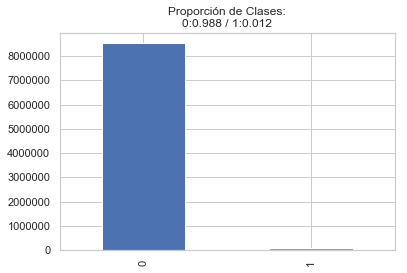

In [11]:
# Check balanceo de clases
plot_target_prop(df.Label)

### Sampling del Dataset

In [12]:
# Obtener la proporción de las clases en el Label
prop = df.Label.value_counts(normalize=True)

In [13]:
# Obtener 100000 samples manteniendo el balance de cada clase
df0 = df[df.Label==0].sample(int(prop[0]*100000))
df1 = df[df.Label==1].sample(int(prop[1]*100000))

In [14]:
# Reemplazo el df original con los dos df de samples
df = pd.concat([df0,df1], axis=0)

In [15]:
# Elimino los df de samples
del df0
del df1

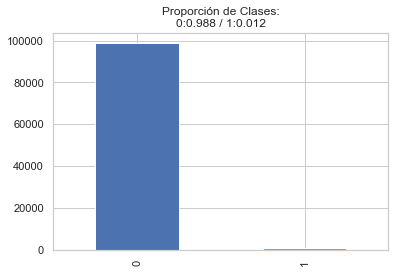

In [16]:
# Check balances
plot_target_prop(df.Label)

### Saving Dataset

In [17]:
df.to_csv('data.csv')